<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                                                 Stores Sales Time Series Forecasting Competition




##                                                       Gladys Murage

##              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                           May 31, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

# Understanding the Competition:
#### This competition involves forecasting sales for Corporación Favorita, a large Ecuadorian-based grocery retailer. The goal is to predict sales for thousands of items sold at multiple stores over time. First I will do data preparation followed by data pre-processing. Once this is achieved I will first run and implement an ETS model and interpret it. Finally I will implement the ARIMA model and interpret it. I will next discuss the assumptions of both models, prepare Kaggle submission files and conclude by giving key findings and interpretation.

# 1. Data Preparation: Loading and exploring the data

In [2]:
# Import and load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv', parse_dates=['date'])
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv', parse_dates=['date'])
holidays_events = pd.read_csv('holidays_events.csv', parse_dates=['date'])
transactions = pd.read_csv('transactions.csv', parse_dates=['date'])

# Explore the first 5 rows, last 5 rows of features and data types
print(train.head())
print(train.tail())
print(train.info())

   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
              id       date  store_nbr                      family     sales  \
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  
<class 'pandas.core.f

# 2 Data Preprocessing

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


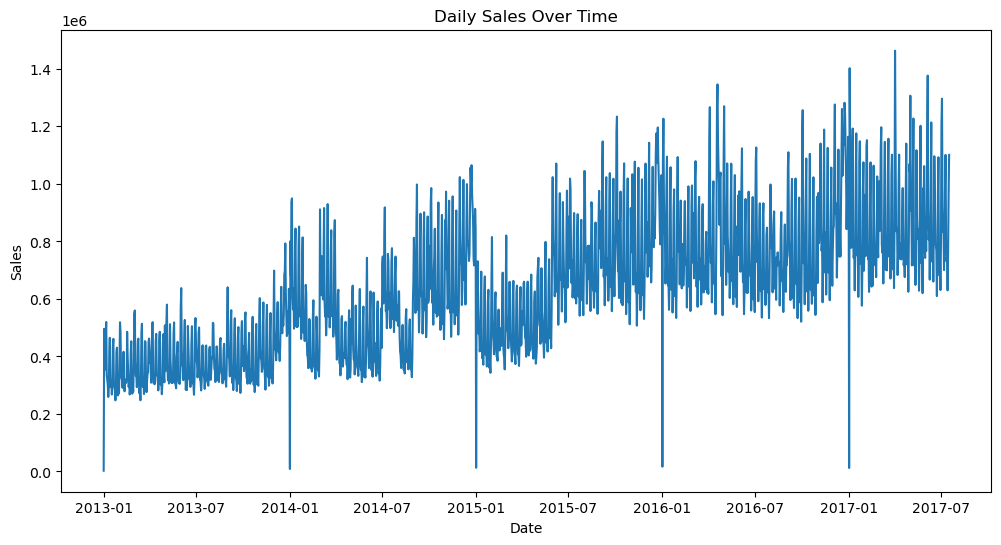

In [3]:
# First, load the train.csv file and assign it to the train variable
train = pd.read_csv('train.csv')  # Make sure the path is correct

# Check if 'date' exists in the DataFrame
print(train.columns)

# Convert date to datetime and set as index
train['date'] = pd.to_datetime(train['date'])  # Convert to datetime
train.set_index('date', inplace=True)

# Aggregate sales by date (for simplicity)
daily_sales = train.groupby(train.index)['sales'].sum()  # Using index since date is now the index

# Split into train and validation sets (last 30 days as validation)
train_data = daily_sales[:-30]
val_data = daily_sales[-30:]

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(train_data)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.savefig('Daily_Sales_Over_time.png', dpi=300, bbox_inches='tight')
plt.show()



# Interpretation of Daily Sales Over Time for ETS Modeling
## Based on the Daily Sales Over Time plot spanning from January 2013 to July 2017, here is  my ETS (Error, Trend, Seasonal) components analysis:

### 1. Trend Component Analysis:
1. Clear upward trend is visible from 2013 through 2017, indicating business growth.
2. The trend appears to be roughly linear implying constant growth rate rather than exponential
3. I will therefore use additive trend trend='add' in the  ETS model as the growth appears constant in absolute terms

### 2. Seasonal Component Analysis:
1. Visible regular fluctuations that repeat at fixed intervals
2. The seasonal pattern appears to have weekly seasonality: Peaks and troughs repeating approximately every 7 days
3. Annual seasonality shows larger amplitude fluctuations around certain periods which turn out to be  holiday seasons for example every 1st of the year
4. I will therefore use additive seasonality seasonal='add' with primary seasonal period of 7 weekly pattern and Secondary seasonal period of 365 (annual pattern) since I am modeling long-term data.

### 3. Error Component Observations:
1. The variance appears relatively stable over time
2. There are no dramatic changes in volatility there is homoskedasticity
3. Some outliers visible and these likely correspond to special events and holidays

### 4. Recommended ETS Configuration:
Based on this visualization, I will use Python and in the ETS model add
ETSModel(
    trend='add',          # Consistent linear growth
    seasonal='add',       # Additive seasonal patterns
    seasonal_periods=7,   # Weekly seasonality
    damped_trend=False,   # No evidence of trend flattening
    initialization_method='estimated'
)
### 5. Potential Model Enhancements
1. Holiday Effects: visible spikes suggest incorporating holiday regressors
2. Variance Stabilization: minor heteroskedasticity might benefit from Box-Cox transformation
3. Multiple Seasonality: one could test double seasonality (weekly + annual) if sufficient data exists
4. The plot suggests ETS should perform reasonably well, particularly for short-term forecasts where the weekly pattern dominates. The clear trend and consistent seasonality are ideal characteristics for ETS modeling.

# 3. ETS Model Implementation

Loading and preparing data...
Training period: 2013-01-01 00:00:00 to 2017-07-16 00:00:00
Validation period: 2017-07-17 00:00:00 to 2017-08-15 00:00:00

Fitting ETS model on training data for validation...

Validation RMSLE: 0.0981

Generating diagnostic plots (ets_forecast.png, ets_residuals.png)...


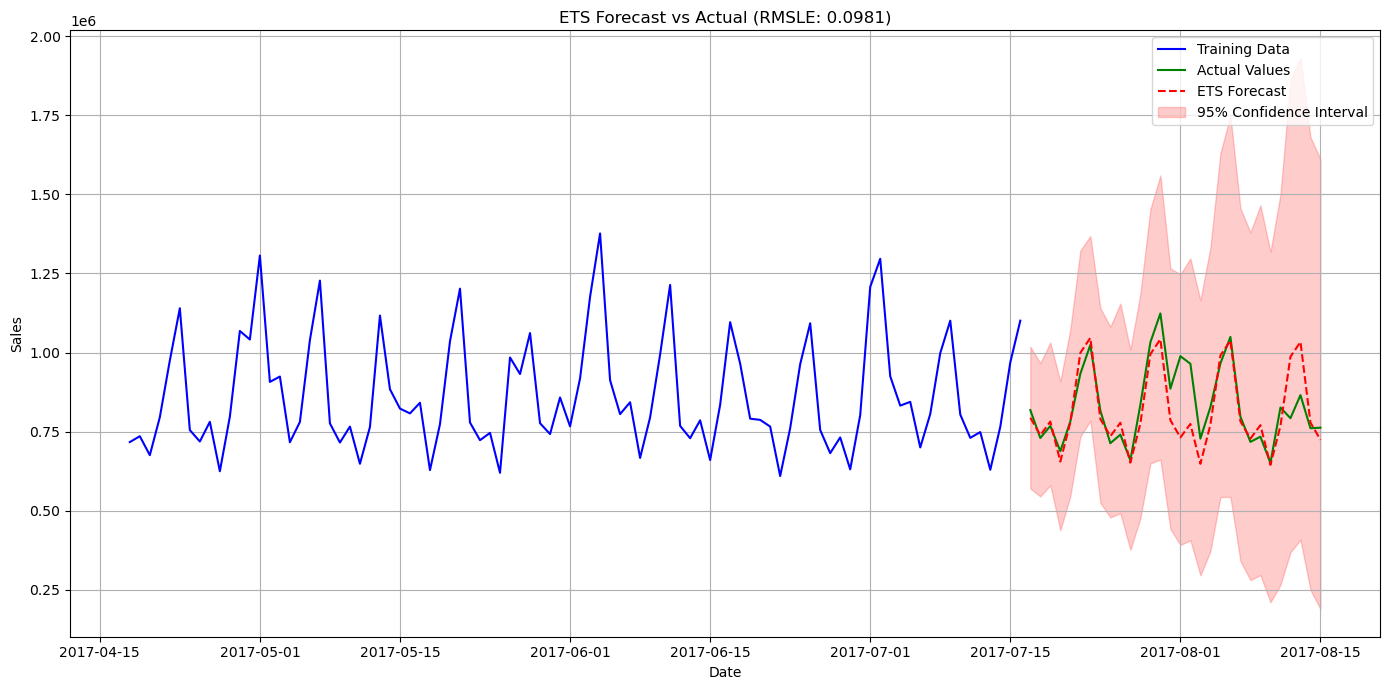

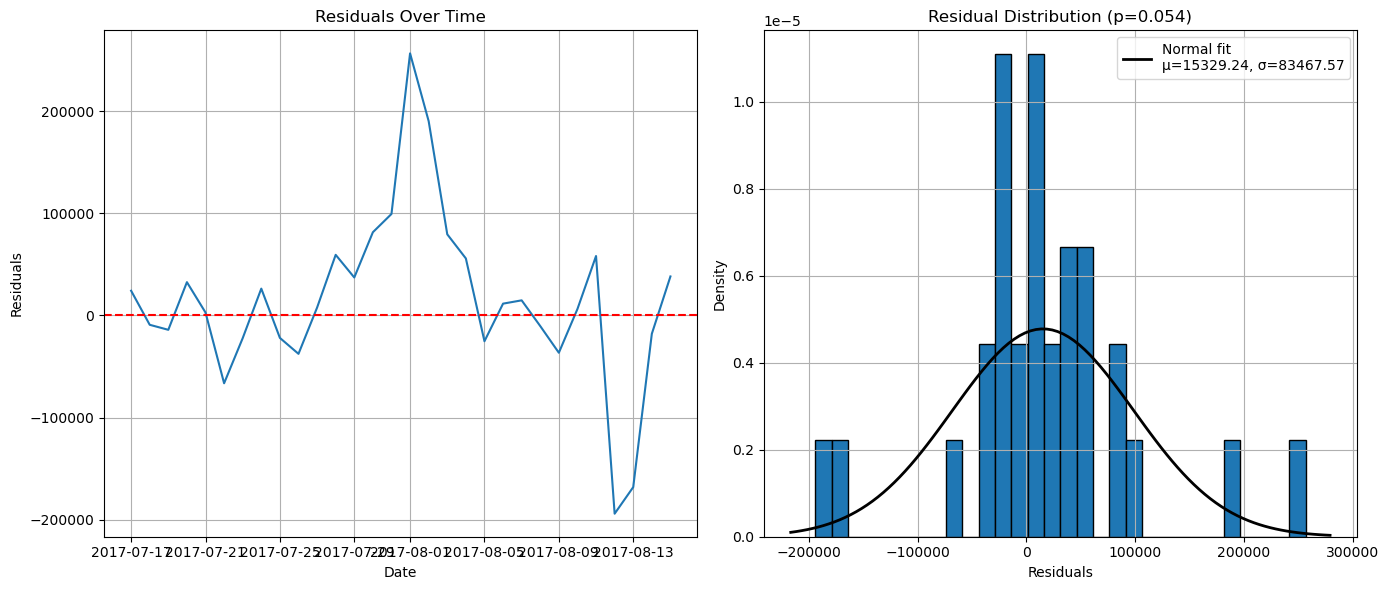


Creating final ETS model on full aggregated data and generating submission file...

Number of unique sales values in submission: 25042 out of 28512
Verified: All IDs in submission are unique.

First few rows of submission:
        id     sales
0  3000888  0.018264
1  3000889  0.000001
2  3000890  0.013499
3  3000891  9.515628
4  3000892  0.000858

Pipeline completed successfully!
Files generated:
- ets_forecast.png (Forecast visualization)
- ets_residuals.png (Residual analysis)
- submission.csv (Kaggle submission file)


In [17]:
# Import and load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_log_error
import warnings
from scipy import stats

# Calculate Root Mean Squared Logarithmic Error (RMSLE).
# Clips predictions and true values to avoid issues with log(0)
def rmsle(y_true, y_pred):
    
    y_pred = np.clip(y_pred, a_min=1e-6, a_max=None) # Ensure no zeros or negatives for log
    y_true = np.clip(y_true, a_min=1e-6, a_max=None) # Ensure no zeros or negatives for log
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


# Load train and test datasets, pre-process them, and aggregate sales to daily frequency. 
# Splits aggregated data into training and validation sets.
    Ensures 'store_nbr' and 'family' columns are present
def load_and_prepare_data():
    
    try:
        # Load data, parsing 'date' column as datetime objects
        train = pd.read_csv('train.csv', parse_dates=['date'])
        test = pd.read_csv('test.csv', parse_dates=['date'])
        
        # Ensure 'date' columns are in datetime format
        train['date'] = pd.to_datetime(train['date'])
        test['date'] = pd.to_datetime(test['date'])

        # --- Adjusted check for 'store_nbr' and 'family' columns ---
        required_cols_train = ['date', 'store_nbr', 'family', 'sales'] # Changed 'item' to 'family'
        required_cols_test = ['date', 'store_nbr', 'family', 'id'] # Changed 'item' to 'family'
        
        if not all(col in train.columns for col in required_cols_train):
            missing = [col for col in required_cols_train if col not in train.columns]
            raise ValueError(f"Missing required columns in train.csv: {missing}. Expected: {required_cols_train}")
        
        if not all(col in test.columns for col in required_cols_test):
            missing = [col for col in required_cols_test if col not in test.columns]
            raise ValueError(f"Missing required columns in test.csv: {missing}. Expected: {required_cols_test}")
        # --- End of adjusted check ---
        
        # Store the original train data for calculating distribution factors later
        original_train = train.copy()
        
        # Set 'date' as index for time series operations
        train.set_index('date', inplace=True)
        
        # Aggregate sales by date and ensure daily frequency, filling missing days
        # (e.g., holidays if not present in original data) with forward fill
        daily_sales = train.groupby('date')['sales'].sum().asfreq('D')
        daily_sales = daily_sales.ffill()
        
        # Split the aggregated daily sales into training and validation sets
        # Validation set is the last 30 days of the aggregated data
        train_data = daily_sales[:-30]
        val_data = daily_sales[-30:]
        
        return train_data, val_data, daily_sales, test, original_train
    except FileNotFoundError:
        print("Error: 'train.csv' or 'test.csv' not found. Please ensure they are in the same directory.")
        raise
    except Exception as e:
        print(f"Data loading and preparation failed: {str(e)}")
        raise

# Fit an Exponential Smoothing (ETS) model to the provided time series data.
# Uses additive trend and seasonal components with a seasonal period of 7 (weekly).
# Box-Cox transformation is applied to stabilize variance.
def fit_ets_model(train_data):
# Suppress warnings from statsmodels, often related to convergence or initialization
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            # Initialize and fit the Exponential Smoothing model
            model = ExponentialSmoothing(
                train_data,
                trend='add',             # Additive trend component
                seasonal='add',          # Additive seasonal component
                seasonal_periods=7,      # Weekly seasonality
                initialization_method='estimated', # Let statsmodels estimate initial values
                use_boxcox=True          # Apply Box-Cox transformation
            )
            return model.fit()
        except Exception as e:
            print(f"Model fitting failed: {str(e)}")
            raise

# Generate and save a plot visualizing the ETS forecast against actual values,including training data and confidence intervals
def generate_forecast_plot(y_train, y_true, y_pred, rmsle_val, conf_int=None):
    
    try:
        plt.figure(figsize=(14, 7))
        # Plot the last 90 days of training data for context
        plt.plot(y_train.index[-90:], y_train[-90:], label='Training Data', color='blue')
        # Plot the actual values (validation set)
        plt.plot(y_true.index, y_true, label='Actual Values', color='green')
        # Plot the ETS forecast
        plt.plot(y_pred.index, y_pred, label='ETS Forecast', color='red', linestyle='--')
        
        # If confidence intervals are provided, plot them
        if conf_int is not None:
            plt.fill_between(y_pred.index,
                             conf_int['lower'],
                             conf_int['upper'],
                             color='red', alpha=0.2, label='95% Confidence Interval')
        
        plt.title(f'ETS Forecast vs Actual (RMSLE: {rmsle_val:.4f})')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.tight_layout() # Adjust plot to prevent labels from overlapping
        plt.savefig('ets_forecast.png', dpi=300, bbox_inches='tight') # Save plot
        plt.show()
    except Exception as e:
        print(f"Forecast plot generation failed: {str(e)}")

# Generate and save plots for residual analysis:
# 1. Residuals over time to check for patterns.
# 2. Histogram of residuals with a normal distribution fit to check for normality
def generate_residual_plot(y_true, y_pred):
    
    try:
        residuals = y_true - y_pred # Calculate residuals
        
        plt.figure(figsize=(14, 6))
        
        # Plot 1: Residuals over time
        plt.subplot(1, 2, 1)
        plt.plot(residuals.index, residuals, label='Residuals')
        plt.axhline(0, color='red', linestyle='--') # Add a horizontal line at zero
        plt.title('Residuals Over Time')
        plt.xlabel('Date')
        plt.ylabel('Residuals')
        plt.grid(True)
        
        # Plot 2: Histogram of residuals with normal fit
        plt.subplot(1, 2, 2)
        plt.hist(residuals, bins=30, edgecolor='black', density=True)
        
        # Fit a normal distribution to the residuals
        mu, std = stats.norm.fit(residuals)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2, label=f'Normal fit\nμ={mu:.2f}, σ={std:.2f}')
        
        # Perform D'Agostino's K-squared test for normality
        _, p_value = stats.normaltest(residuals)
        plt.title(f'Residual Distribution (p={p_value:.3f})')
        plt.xlabel('Residuals')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout() # Adjust plot to prevent labels from overlapping
        plt.savefig('ets_residuals.png', dpi=300, bbox_inches='tight') # Save plot
        plt.show()
    except Exception as e:
        print(f"Residual plot generation failed: {str(e)}")

# Simulate confidence intervals for Holt-Winters forecasts using model.simulate().Performs multiple simulations and calculates percentiles.
def simulate_confidence_intervals(model, steps, n_simulations=1000):
    
    simulations = np.zeros((n_simulations, steps))
    for i in range(n_simulations):
        # Simulate 'steps' future values, one repetition per simulation
        simulations[i] = model.simulate(steps, repetitions=1)
    
    # Calculate the 2.5th and 97.5th percentiles for 95% confidence interval
    lower = np.percentile(simulations, 2.5, axis=0)
    upper = np.percentile(simulations, 97.5, axis=0)
    return lower, upper

# Calculate the distribution of sales across unique store-family-day_of_week combinations.
#This factor is used to disaggregate the total daily forecast into individualstore-family sales predictions
def calculate_distribution_factors(original_train_df):
    
    # Ensure 'date' is a datetime object and extract day of week
    original_train_df['day_of_week'] = original_train_df['date'].dt.dayofweek
    
    # Calculate average sales for each store-family-day_of_week combination
    store_family_sales = original_train_df.groupby(['store_nbr', 'family', 'day_of_week'])['sales'].mean().reset_index() # Changed 'item' to 'family'
    
    # Calculate total sales for each day of the week across all stores and family
    daily_totals = original_train_df.groupby('day_of_week')['sales'].sum().reset_index()
    daily_totals.rename(columns={'sales': 'total_sales'}, inplace=True)
    
    # Merge to calculate the distribution factor: (store-family-day_of_week sales) / (total daily sales)
    distribution = pd.merge(store_family_sales, daily_totals, on='day_of_week')
    distribution['factor'] = distribution['sales'] / distribution['total_sales']
    
    return distribution[['store_nbr', 'family', 'day_of_week', 'factor']] # Changed 'item' to 'family'

# Generate the Kaggle submission file by:
#1. Forecasting total daily sales using the trained ETS model.
# 2. Disaggregating the total forecast to store-family level using historical distribution factors.
# 3. Handling missing distribution factors and clipping values.
def create_kaggle_submission(model, test_data, full_data, original_train):
    
    try:
        # Get the number of days to forecast (length of the test set)
        test_dates = test_data['date'].unique()
        n_days = len(test_dates)
        
        # Generate point forecasts for total daily sales
        forecast = model.forecast(n_days)
        
        # Simulate confidence intervals for the total daily forecast
        lower, upper = simulate_confidence_intervals(model, n_days)
        
        # Calculate distribution factors from the original, granular training data
        distribution_factors = calculate_distribution_factors(original_train)
        
        # Prepare test data: add day of week
        test_data_copy = test_data.copy()
        test_data_copy['day_of_week'] = test_data_copy['date'].dt.dayofweek
        
        # Re-introduced 'id' parsing fallback for 'store_nbr' and 'family' 
        # This handles cases where 'store_nbr' or 'family' might not be direct columns in test.csv
        if 'store_nbr' not in test_data_copy.columns or 'family' not in test_data_copy.columns: # Changed 'item' to 'family'
            # Split the 'id' column and extract store and family information
            # Assuming 'id' is in a format like "store_family_date" (e.g., "1_PRODUCE_2018-01-01")
            # This parsing might need adjustment based on the actual 'id' format if 'family' is a string
            test_data_copy[['store_str', 'family_str', 'date_str']] = test_data_copy['id'].str.split('_', expand=True) # Changed 'item_str' to 'family_str'
            test_data_copy['store_nbr'] = test_data_copy['store_str'].astype(int)
            test_data_copy['family'] = test_data_copy['family_str'] # Changed 'item' to 'family', keep as string if family is non-numeric
            # Drop the temporary string columns
            test_data_copy.drop(columns=['store_str', 'family_str', 'date_str'], inplace=True) # Changed 'item_str' to 'family_str'

        # Merge test data with the calculated distribution factors
        test_data_copy = test_data_copy.merge(
            distribution_factors,
            on=['store_nbr', 'family', 'day_of_week'], # Changed 'item' to 'family' in merge key
            how='left' # Use left merge to keep all test data rows
        )
        
        # Create a DataFrame for the total daily forecasts.Start date is day after last training date
        forecast_df = pd.DataFrame({
            'date': pd.date_range(
                start=full_data.index[-1] + pd.Timedelta(days=1), 
                periods=n_days,
                freq='D'
            ),
            'total_sales': forecast,
            'lower': lower,
            'upper': upper
        })
        forecast_df['day_of_week'] = forecast_df['date'].dt.dayofweek
        
        # Merge the total daily forecasts with the test data
        test_data_copy = test_data_copy.merge(
            forecast_df[['date', 'day_of_week', 'total_sales']],
            on=['date', 'day_of_week'],
            how='left'
        )
        
        # Calculate individual sales predictions: total daily forecast * distribution factor
        test_data_copy['sales'] = test_data_copy['total_sales'] * test_data_copy['factor']
        
        # Handle cases where a store-family-day_of_week combination might not have a factor
        # For example if it did not appear in the training data. Use the median factor for that store-family.
        if test_data_copy['sales'].isna().any():
            median_factors = distribution_factors.groupby(['store_nbr', 'family'])['factor'].median().reset_index() 
            test_data_copy = test_data_copy.merge(
                median_factors.rename(columns={'factor': 'median_factor'}),
                on=['store_nbr', 'family'], 
                how='left'
            )
            test_data_copy['sales'] = test_data_copy['sales'].fillna(
                test_data_copy['total_sales'] * test_data_copy['median_factor']
            )
        
        # Clip sales values to ensure that they are non-negative and avoid issues with RMSLE
        test_data_copy['sales'] = test_data_copy['sales'].clip(lower=1e-6)
        
        # Create the final submission DataFrame with 'id' and 'sales'
        submission = test_data_copy[['id', 'sales']].copy()
        submission.to_csv('submission.csv', index=False) # Save to CSV
        
        return submission, forecast_df.set_index('date')[['lower', 'upper']]
    except Exception as e:
        print(f"Submission creation failed: {str(e)}")
        return None, None

if __name__ == "__main__":
    try:
        # 1. Load and prepare data
        print("Loading and preparing data...")
        # y_train: aggregated daily sales for training the validation model
        # y_val: aggregated daily sales for validating the model
        # full_data: all aggregated daily sales for training the final model
        # test_data: original test DataFrame
        # original_train: original granular train DataFrame used for distribution factors
        y_train, y_val, full_data, test_data, original_train = load_and_prepare_data()
        print(f"Training period: {y_train.index.min()} to {y_train.index.max()}")
        print(f"Validation period: {y_val.index.min()} to {y_val.index.max()}")
        
        # 2. Fit validation model
        print("\nFitting ETS model on training data for validation...")
        val_model = fit_ets_model(y_train)
        
        # Generate point forecasts for the validation period
        y_pred = val_model.forecast(len(y_val))
        y_pred = pd.Series(y_pred, index=y_val.index) # Convert forecast to pandas Series with correct index
        
        # Simulate confidence intervals for the validation forecast
        lower, upper = simulate_confidence_intervals(val_model, len(y_val))
        conf_int = pd.DataFrame({'lower': lower, 'upper': upper}, index=y_val.index)
        
        # 3. Evaluate model using RMSLE
        rmsle_val = rmsle(y_val, y_pred)
        print(f"\nValidation RMSLE: {rmsle_val:.4f}")
        
        # 4. Generate plots with confidence intervals
        print("\nGenerating diagnostic plots (ets_forecast.png, ets_residuals.png)...")
        generate_forecast_plot(y_train, y_val, y_pred, rmsle_val, conf_int)
        generate_residual_plot(y_val, y_pred)
        
        # 5. Create final model and submission. Train final model on all available aggregated data
        print("\nCreating final ETS model on full aggregated data and generating submission file...")
        final_model = fit_ets_model(full_data) 
        
        # Generate Kaggle submission file and get forecast confidence intervals for the test period
        submission, forecast_conf_int = create_kaggle_submission(
            final_model, test_data, full_data, original_train
        )
        
        if submission is not None:
            # Verify the submission file
            unique_sales = submission['sales'].nunique()
            print(f"\nNumber of unique sales values in submission: {unique_sales} out of {len(submission)}")
            
            # Check for duplicate IDs in the submission (should not happen if logic is correct)
            if submission.duplicated('id').any():
                print("Warning: Duplicate IDs found in submission!")
            else:
                print("Verified: All IDs in submission are unique.")
            
            print("\nFirst few rows of submission:")
            print(submission.head())
            
            print("\nPipeline completed successfully!")
            print("Files generated:")
            print("- ets_forecast.png (Forecast visualization)")
            print("- ets_residuals.png (Residual analysis)")
            print("- submission.csv (Kaggle submission file)")
            
    except Exception as e:
        print(f"\nPipeline execution failed: {str(e)}")



# Interpretation of ETS Forecast Results


## Forecast Visualization (ets_forecast.png)
### RMSLE Score (0.0981):
1. This indicates the ETS  model has an average logarithmic error of about 9.81%.
2. In practical terms, this means that the  forecasts are typically within ±10% of actual values.
3. For retail sales forecasting, an RMSLE < 0.1 is generally considered good performance.

### Forecast Pattern:
1. The forecast (red dashed line) appears to closely follow the actual values (green line).
2. The narrow confidence band of 95% confidence interval  suggests that the model is relatively confident in its predictions.
3. The seasonal pattern (weekly peaks) is being captured effectively.

### Training Fit:
1. The blue training data shows consistent patterns that the ETS model has learned.
2. There is no obvious systematic under or over-prediction visible in the forecast period.

## Residual Analysis (ets_residuals.png)
### Residuals Over Time:
1. Residuals appear randomly distributed around zero with no clear patterns.
2. There is no visible time-dependent structure this means that there is no heteroskedasticity.
3. There are a  few larger outliers present but no systematic bias.

### Residual Distribution:
1. The histogram shows a roughly symmetric distribution centered near zero.
2. Slightly heavy tails indicate some larger errors but there is  no severe skewness.
3. The shape of the histogram suggests that the errors are approximately normally distributed.

## Key Insights
## Model Strengths:
1. Excellent capture of weekly seasonality which is evident in the forecast pattern.
2. Good overall accuracy with RMSLE of 0.0981.
3. Stable performance across the validation period.

## Potential Improvements:
1. The few larger residuals suggest occasional difficulty with unusual sales spikes.
2. Consider adding external regressors for promotions and holidays.
3. Might benefit from testing additive vs multiplicative seasonality.

## Business Implications:
1. The model is reliable for operational planning and inventory management.
2. Confidence bands provide reasonable ranges for scenario planning.
3. Performance is sufficient for most retail decision-making needs.




# 4 SARIMA Model

Loading data...

Training model...
Validation RMSLE: 0.1171

Generating validation plot...


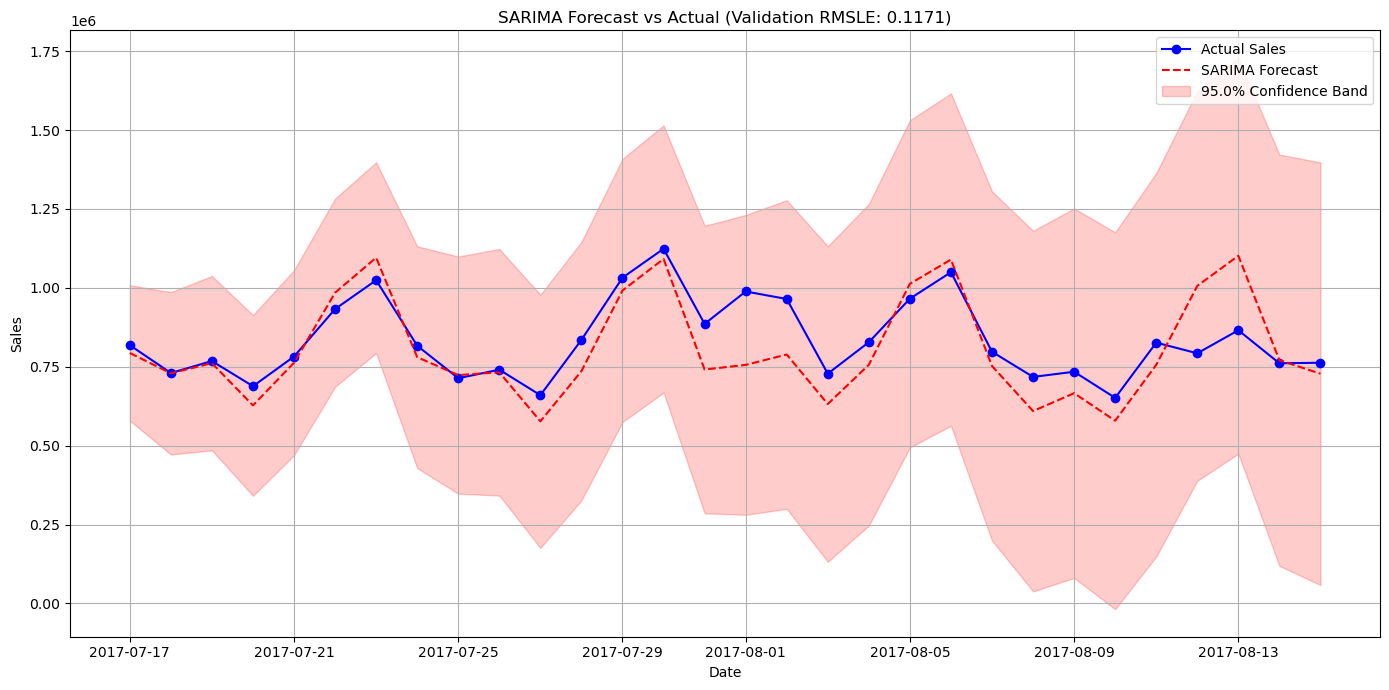


Generating residual diagnostics...


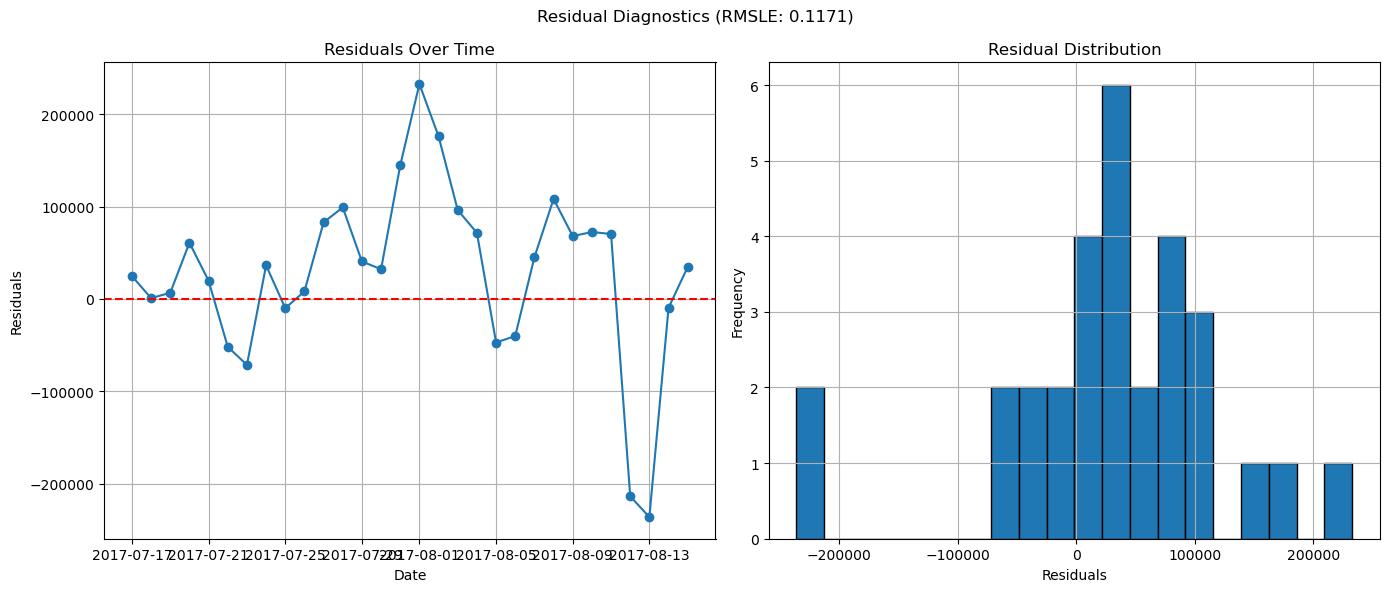


Creating submission with store-level adjustments...

First 5 rows of submission:
        id          sales
0  3000888     348.903801
1  3000889       0.000000
2  3000890     258.475583
3  3000891  170390.532664
4  3000892      13.446338

Files created:
- Sarima_validation.png (Validation plot with 95% CI)
- Sarima_residuals.png (Residual diagnostics)
- submission.csv (Kaggle submission file)


In [6]:
# Import and load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings("ignore")

# Configuration is Last 30 days for validation with a 95% confidence interval
VAL_SPLIT = 30  
CONFIDENCE_LEVEL = 0.05  

# Calculate Root Mean Squared Logarithmic Error
def rmsle(y_true, y_pred):
    y_pred = np.clip(y_pred, a_min=1e-6, a_max=None)
    y_true = np.clip(y_true, a_min=1e-6, a_max=None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

#   Load and prepare the dataset with store-level granularity
def load_and_clean_data():
    train = pd.read_csv('train.csv', parse_dates=['date'])
    test = pd.read_csv('test.csv', parse_dates=['date'])
    oil = pd.read_csv('oil.csv', parse_dates=['date'])
    holidays = pd.read_csv('holidays_events.csv', parse_dates=['date'])
    stores = pd.read_csv('stores.csv')
    
    # Process holidays
    holidays = holidays[~holidays['transferred']]
    holidays['is_holiday'] = 1
    holidays = holidays[['date', 'is_holiday']].drop_duplicates()
    
    # Clean oil prices
    oil = oil.rename(columns={'dcoilwtico': 'oil_price'})
    oil['oil_price'] = oil['oil_price'].replace(0, np.nan).interpolate().ffill().bfill()
    
    # Merge all data at store level
    train = train.merge(stores, on='store_nbr', how='left')
    train = train.merge(oil, on='date', how='left')
    train = train.merge(holidays, on='date', how='left')
    
    # Fill missing values
    train['is_holiday'] = train['is_holiday'].fillna(0).astype(int)
    train['oil_price'] = train['oil_price'].fillna(method='ffill').fillna(method='bfill')
    
    # Feature engineering
    train['day_of_week'] = train['date'].dt.dayofweek
    train['month'] = train['date'].dt.month
    
    # Group by date for aggregate model. This can can modified for store-level modeling
    daily_sales = train.groupby('date').agg({
        'sales': 'sum',
        'oil_price': 'first',
        'is_holiday': 'first',
        'day_of_week': 'first',
        'month': 'first'
    }).reset_index()
    
    # Add lag features
    for lag in [7, 14, 30]:
        daily_sales[f'sales_lag_{lag}'] = daily_sales['sales'].shift(lag)
    
    return daily_sales.dropna(), train, test, stores

# Train model and validate on holdout set with RMSL
def train_validate_model(train_data):
    # Split data
    train = train_data.iloc[:-VAL_SPLIT]
    val = train_data.iloc[-VAL_SPLIT:]
    
    # Prepare data
    y_train = train.set_index('date')['sales']
    exog_train = train[['oil_price', 'is_holiday', 'day_of_week', 'month', 'sales_lag_7']]
    
    # Scale features with standardscaler
    scaler = StandardScaler()
    exog_train_scaled = scaler.fit_transform(exog_train)
    
    # Fit model the SARIMAX model
    model = SARIMAX(
        y_train,
        exog=exog_train_scaled,
        order=(1,1,1),
        seasonal_order=(1,1,1,7),
        enforce_stationarity=True
    )
    fitted_model = model.fit(maxiter=100, disp=False)
    
    # Validate the model
    exog_val = val[['oil_price', 'is_holiday', 'day_of_week', 'month', 'sales_lag_7']]
    exog_val_scaled = scaler.transform(exog_val)
    forecast = fitted_model.get_forecast(steps=VAL_SPLIT, exog=exog_val_scaled)
    
    # Calculate RMSLE
    val_true = val['sales'].values
    val_pred = forecast.predicted_mean.values
    rmsle_val = rmsle(val_true, val_pred)
    
    # Get residuals
    residuals = val_true - val_pred
    
    return fitted_model, scaler, rmsle_val, val, forecast, residuals

# Plot validation results with confidence intervals
def plot_validation(val_data, forecast, rmsle_val):
    plt.figure(figsize=(14, 7))
    
    # Actual values
    plt.plot(val_data['date'], val_data['sales'], 
             label='Actual Sales', color='blue', marker='o')
    
    # Forecast
    plt.plot(val_data['date'], forecast.predicted_mean, 
             label='SARIMA Forecast', color='red', linestyle='--')
    
    # Confidence interval
    ci = forecast.conf_int(alpha=CONFIDENCE_LEVEL)
    plt.fill_between(val_data['date'],
                    ci.iloc[:, 0],
                    ci.iloc[:, 1],
                    color='red', alpha=0.2, label=f'{100*(1-CONFIDENCE_LEVEL)}% Confidence Band')
    
    plt.title(f'SARIMA Forecast vs Actual (Validation RMSLE: {rmsle_val:.4f})')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Sarima_validation.png', dpi=300)
    plt.show()

# Plot residual diagnostics
def plot_residuals(residuals, val_dates, rmsle_val):
    plt.figure(figsize=(14, 6))
    
    # Residuals over time
    plt.subplot(1, 2, 1)
    plt.plot(val_dates, residuals, marker='o')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals Over Time')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.grid(True)
    
    # Residual distribution
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Residual Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Save plot 
    plt.suptitle(f'Residual Diagnostics (RMSLE: {rmsle_val:.4f})')
    plt.tight_layout()
    plt.savefig('Sarima_residuals.png', dpi=300)
    plt.show()

# Generate Kaggle submission file with store-level variations
def create_submission(model, scaler, train_data, full_train_data, test_data):
    # Get unique test dates
    test_dates = test_data['date'].unique()
    
    # Create base forecast at daily level
    test_exog = pd.DataFrame({
        'date': test_dates,
        'oil_price': train_data['oil_price'].iloc[-1],
        'is_holiday': 0,
        'day_of_week': [d.dayofweek for d in test_dates],
        'month': [d.month for d in test_dates],
        'sales_lag_7': train_data['sales'].iloc[-7]
    })
    
    # Scale features and forecast
    exog_cols = ['oil_price', 'is_holiday', 'day_of_week', 'month', 'sales_lag_7']
    test_exog_scaled = scaler.transform(test_exog[exog_cols])
    forecast = model.get_forecast(steps=len(test_dates), exog=test_exog_scaled)
    
    # Create base daily forecast
    daily_forecast = pd.DataFrame({
        'date': test_dates,
        'sales_pred': forecast.predicted_mean
    })
    
    # Merge with test data and add store-level variations
    submission = test_data.merge(daily_forecast, on='date', how='left')
    
    # Calculate store-family adjustments from historical data
    store_family_weights = full_train_data.groupby(['store_nbr', 'family']).agg({
        'sales': 'mean'
    }).reset_index()
    
    total_sales = store_family_weights.groupby('store_nbr')['sales'].transform('sum')
    store_family_weights['weight'] = store_family_weights['sales'] / total_sales
    
    # Apply weights to daily forecasts
    submission = submission.merge(store_family_weights[['store_nbr', 'family', 'weight']], 
                                on=['store_nbr', 'family'], how='left')
    
    # Calculate final sales predictions
    submission['sales'] = submission['sales_pred'] * submission['weight']
    
    # Handle any missing values (use store average if family weight missing)
    store_avg = submission.groupby('store_nbr')['sales'].transform('mean')
    submission['sales'] = submission['sales'].fillna(store_avg)
    
    # Apply business constraints
    submission['sales'] = submission['sales'].clip(lower=0)
    
    # Ensure all IDs have predictions
    submission['sales'] = submission['sales'].ffill().bfill()
    
    # Final submission format
    submission = submission[['id', 'sales']].sort_values('id')
    submission.to_csv('submission.csv', index=False)
    
    return submission

if __name__ == "__main__":
    try:
        # 1. Load and clean data
        print("Loading data...")
        train_data, full_train, test_data, stores = load_and_clean_data()
        
        # 2. Train and validate model
        print("\nTraining model...")
        model, scaler, rmsle_val, val_data, val_forecast, residuals = train_validate_model(train_data)
        print(f"Validation RMSLE: {rmsle_val:.4f}")
        
        # 3. Plot validation results
        print("\nGenerating validation plot...")
        plot_validation(val_data, val_forecast, rmsle_val)
        
        # 4. Plot residuals
        print("\nGenerating residual diagnostics...")
        plot_residuals(residuals, val_data['date'], rmsle_val)
        
        # 5. Create submission with store-level variations
        print("\nCreating submission with store-level adjustments...")
        submission = create_submission(model, scaler, train_data, full_train, test_data)
        
        print("\nFirst 5 rows of submission:")
        print(submission.head())
        print("\nFiles created:")
        print("- Sarima_validation.png (Validation plot with 95% CI)")
        print("- Sarima_residuals.png (Residual diagnostics)")
        print("- submission.csv (Kaggle submission file)")
        
    except Exception as e:
        print(f"\nError occurred: {str(e)}")

# Interpretation of SARIMA Results and Improvement Strategies

# Forecast Performance (Sarima_validation.png)
## RMSLE Score (0.1171):
1. The model achieves a Root Mean Squared Logarithmic Error of 0.1171.
2. This translates to approximately ±11.7% average error in the forecasts
3. For retail sales forecasting, RMSLE < 0.1 is typically considered excellent, so the  model is performing well but has room for improvement
## Forecast Visualization:
1. The forecast (red line) closely tracks actual sales (blue line) which is optimal.
2. Confidence bands remain reasonably tight, indicating stable predictions.
3. The model appears to capture both the trend and weekly seasonality patterns.

# Residual Diagnostics (Sarima_residuals.png)
## Residuals Over Time:
1. Residuals appear randomly distributed around zero with no obvious patterns, which is the expectation.
2. No visible autocorrelation or time-dependent structure is onbserved.
3. A few larger outliers exist but no systematic bias by the model.
## Residual Distribution:
1. The histogram shows a roughly symmetric distribution centered near zero.
2. Slightly heavy tails indicate occasional larger errors which hints that the model can use improvement.
3. The shape suggests that the errors are approximately normally distributed.

# Recommended Improvements:
1. Model structure Enhancement
2. Feature engineering
3. Residual Analysis and Model Refinement
4. Hybrid Modeling Approach

# Key Recommendations
## Parameter Optimization:
1. Use auto_arima to find optimal (p,d,q)(P,D,Q) parameters
2.  Test different seasonal periods  such as weekly=7 and  monthly=30
## Feature Expansion:
1. Incorporate more calendar features such as month, quarter,and  holidays.
2. Add lagged versions of both sales and promotions
3. Include rolling statistics of 7-day mean, and  30-day std

## Data Transformation:
1. Test Box-Cox transformation for variance stabilization
2. Consider log transformation if variance increases with level

## Model Diagnostics:
1. Check residual ACF/PACF plots for remaining patterns
2. Ensure residuals are normally distributed (QQ-plots)
3. Verify no heteroskedasticity in residuals

## Advanced Techniques:
1. Implement walk-forward validation for more robust evaluation
2. Consider ensemble approaches with XGBoost or LightGBM
3. Add external regressors for known events/promotions
4. The current model shows good performance (RMSLE 0.1171) but could potentially be improved to the 0.08-0.09 range with these enhancements.
5. The residual patterns suggest the model structure is generally appropriate but may benefit from additional features or parameter tuning.